In [3]:
## **1. Getting Best Accuracy:**

In [4]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Loading the data
data0 = pd.read_csv('urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,1,1,1,1,0,1,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,1,1,1,1,0,1,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,1,1,1,1,0,1,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,1,1,1,1,1,1,1,1,0
4,icicibank.com,0,0,1,3,0,0,0,0,1,1,1,1,1,1,1,0,0


In [7]:
#Checking the shape of the dataset
data0.shape

(10000, 18)

In [8]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [9]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

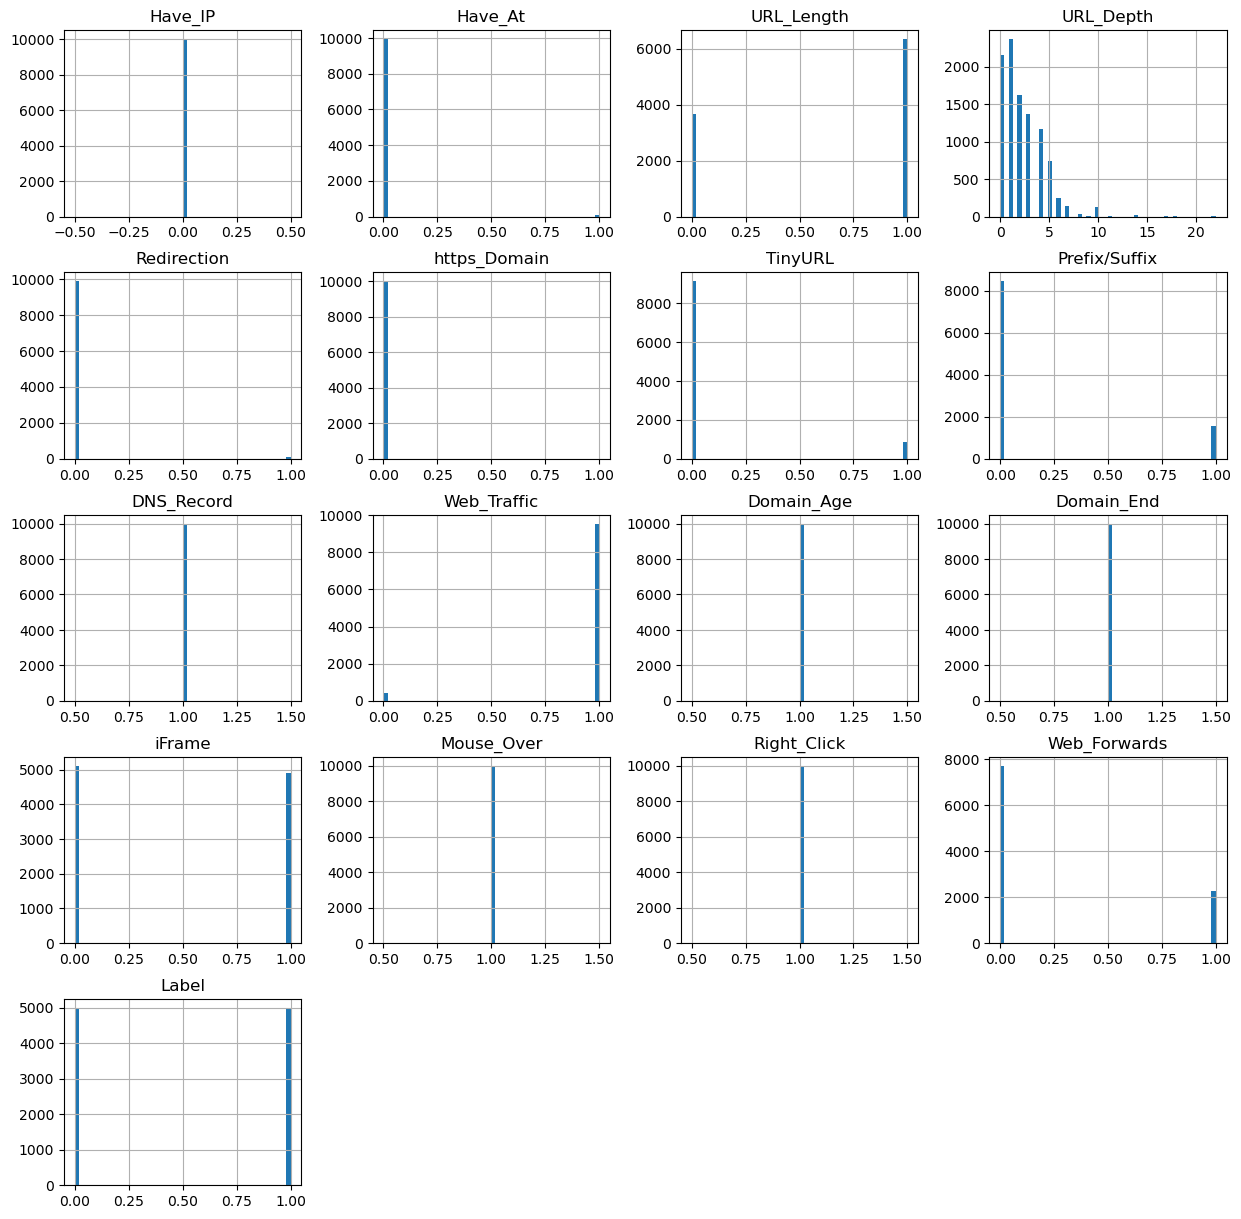

In [10]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

In [12]:
# print(data0.dtypes)
# Select only numeric columns for correlation
data0_numeric = data0.select_dtypes(include=[np.number])

# If you want to check for any remaining non-numeric columns
if data0_numeric.shape[1] == 0:
    print("No numeric columns available for correlation.")

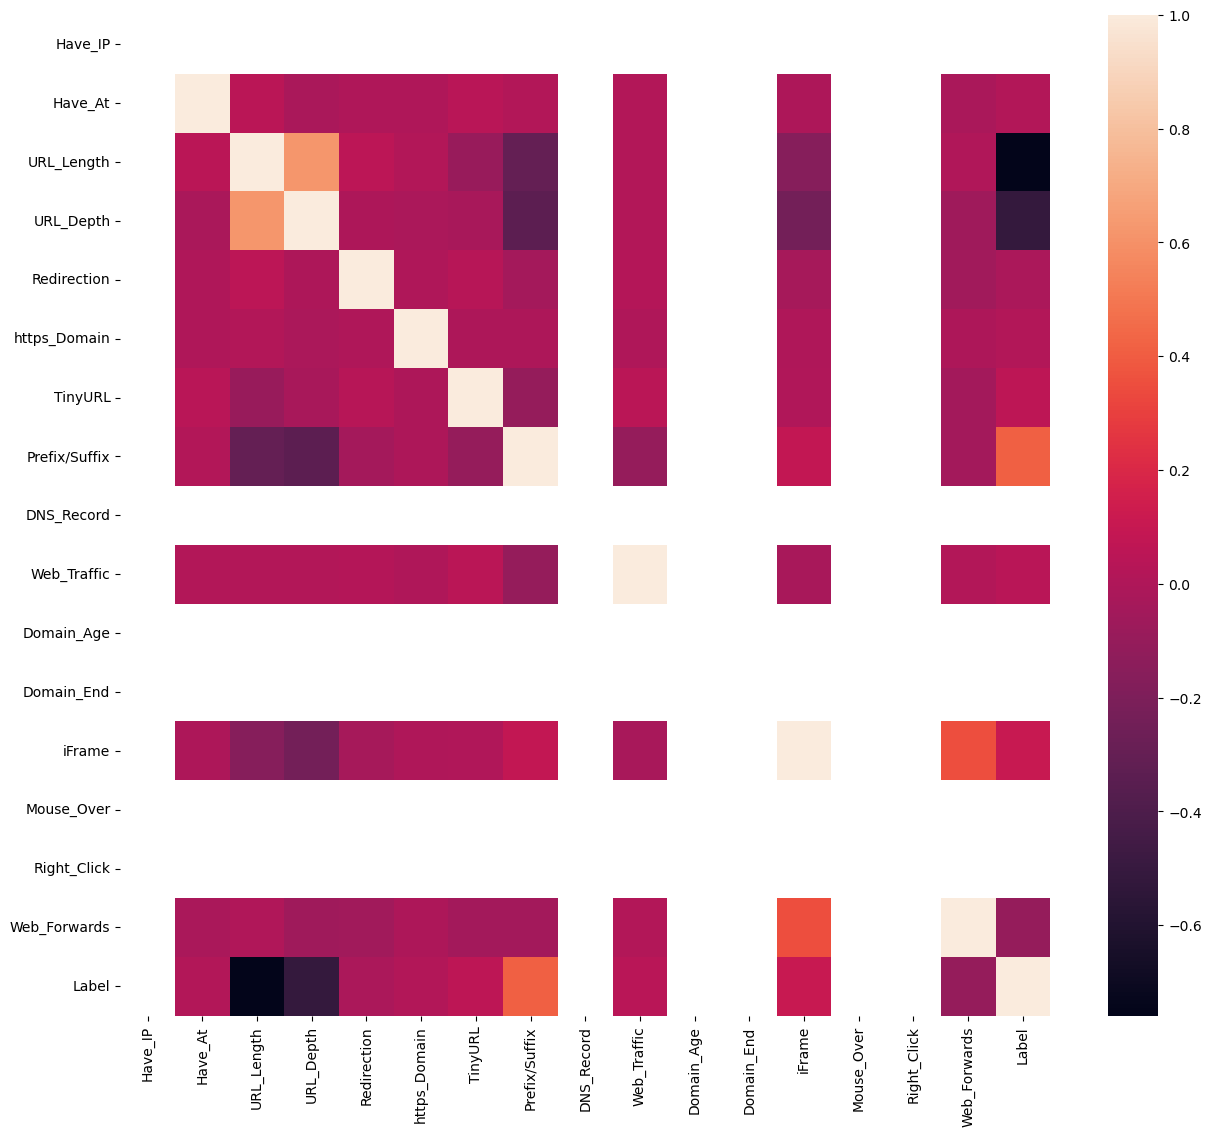

In [13]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0_numeric.corr())
plt.show()

In [14]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.0,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0,10000.000000,10000.0,10000.0,10000.000000,10000.0,10000.0,10000.000000,10000.000000
mean,0.0,0.006300,0.634400,2.24960,0.011700,0.000200,0.08750,0.155400,1.0,0.955300,1.0,1.0,0.488900,1.0,1.0,0.227100,0.500000
std,0.0,0.079126,0.481622,2.09326,0.107537,0.014141,0.28258,0.362304,0.0,0.206655,0.0,0.0,0.499902,0.0,0.0,0.418979,0.500025
min,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,1.0,0.000000,1.0,1.0,0.000000,1.0,1.0,0.000000,0.000000
25%,0.0,0.000000,0.000000,1.00000,0.000000,0.000000,0.00000,0.000000,1.0,1.000000,1.0,1.0,0.000000,1.0,1.0,0.000000,0.000000
50%,0.0,0.000000,1.000000,2.00000,0.000000,0.000000,0.00000,0.000000,1.0,1.000000,1.0,1.0,0.000000,1.0,1.0,0.000000,0.500000
75%,0.0,0.000000,1.000000,3.00000,0.000000,0.000000,0.00000,0.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,0.000000,1.000000
max,0.0,1.000000,1.000000,22.00000,1.000000,1.000000,1.00000,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.000000,1.000000


In [17]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

In [18]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [19]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,1,0,0,1,0,1,1,1,1,1,1,1,0,1
1,0,0,1,2,0,0,0,0,1,1,1,1,0,1,1,0,0
2,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1
3,0,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,1
4,0,0,0,1,0,0,0,0,1,0,1,1,1,1,1,1,1


In [20]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [67]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score


In [69]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [70]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=100)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=100, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [72]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.935
XGBoost : Accuracy on test Data: 0.929


In [74]:
scores = cross_val_score(xgb, X_train, y_train, cv=5)
print(f"Mean Accuracy: {scores.mean():.2f}")

Mean Accuracy: 0.93


In [27]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

In [28]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,XGBoost,0.935,0.928


In [29]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

In [30]:
# load model from file
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)